# This notebook check gender classifier at different depth of dens layer

In [ ]:

import tensorflow as tf

# Check for TensorFlow GPU access
print(f"TensorFlow has access to the following devices:\n{tf.config.list_physical_devices()}")

# See TensorFlow version
print(f"TensorFlow version: {tf.__version__}")

In [1]:
from os import chdir
chdir("../")   # only run this ones else error will occur


In [2]:
import numpy as np
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
from IPython.display import clear_output

from datetime import datetime

In [12]:
X_train_l = np.load('private/npy/X_train_gender.npy')
X_test_l = np.load('private/npy/X_test_gender.npy')
y_train_l = np.load('private/npy/y_train_gender.npy')
y_test_l = np.load('private/npy/y_test_gender.npy')

In [13]:
# Select 15% of the data randomly
num_samples_train = int(0.15 * len(X_train_l))
num_samples_test = int(0.15 * len(X_test_l))

# Randomly select indices
indices_train = np.random.choice(len(X_train_l), num_samples_train, replace=False)
indices_test = np.random.choice(len(X_test_l), num_samples_test, replace=False)

# Select data based on random indices
X_train_l = X_train_l[indices_train]
y_train_l = y_train_l[indices_train]
X_test_l = X_test_l[indices_test]
y_test_l = y_test_l[indices_test]

In [10]:
def create_model(depth):
    model = models.Sequential()
    model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(128, 130, 1)))
    model.add(layers.MaxPooling2D((2, 2)))

    # only one conv layer is taken
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())

    for _ in range(depth):
        model.add(layers.Dense(64, activation='relu'))

    model.add(layers.Dense(2, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])


    return model


In [6]:
def train_models(depths, epochs,iterations):
    T1=datetime.now()
    index=0  #used in "Estimated Time Required :" to keep time record

    validation_accuracies = []
    for i in range(iterations):

        validation_accuracie=[]
        for depth in depths:
            print("Iteration :",i+1)
            print("Training model of depth :",depth)
            t1=datetime.now()   


            # Create model
            model = create_model(depth)
            # Train model
            history = model.fit(X_train_l, y_train_l, epochs=epochs, validation_data=(X_test_l, y_test_l), batch_size=64,verbose=1)
            # Record validation accuracy
            validation_accuracie.append(history.history['val_accuracy'])


            t2=datetime.now()   
            clear_output(wait=False)

            index+=1
            print("Estimated Time Required :",int((t2-t1).seconds)*((len(depths)*iterations)-index)/60," min")

        validation_accuracies.append(validation_accuracie)

    T2=datetime.now()
    clear_output(wait=False)
    print("Time taken :",(T2-T1).seconds,"s")

    return validation_accuracies


In [14]:
depths = [1,2,3,4] 
epochs = 10
iteration=25

# Train models and save validation accuracies
validation_accuracies=train_models(depths, epochs,iteration)


Time taken : 3310 s


In [15]:
combined_array = np.array(validation_accuracies)

In [ ]:
combined_array

In [16]:
column_averages = np.mean(combined_array, axis=0)

# Print the average of each column
print("Average of each column:", column_averages)

Average of each column: [[0.51755556 0.57788888 0.61922221 0.62711111 0.64044443 0.66333333
  0.68444444 0.67888888 0.70744444 0.72544444]
 [0.56622221 0.58033332 0.55299999 0.55377777 0.61122222 0.62866666
  0.6121111  0.58222222 0.57966666 0.58911111]
 [0.55166666 0.544      0.515      0.55288889 0.57844444 0.59722222
  0.59066666 0.61777777 0.66522222 0.64355556]
 [0.56388889 0.56433333 0.57477777 0.56988889 0.58433333 0.56177777
  0.56222222 0.57755555 0.613      0.57788889]]


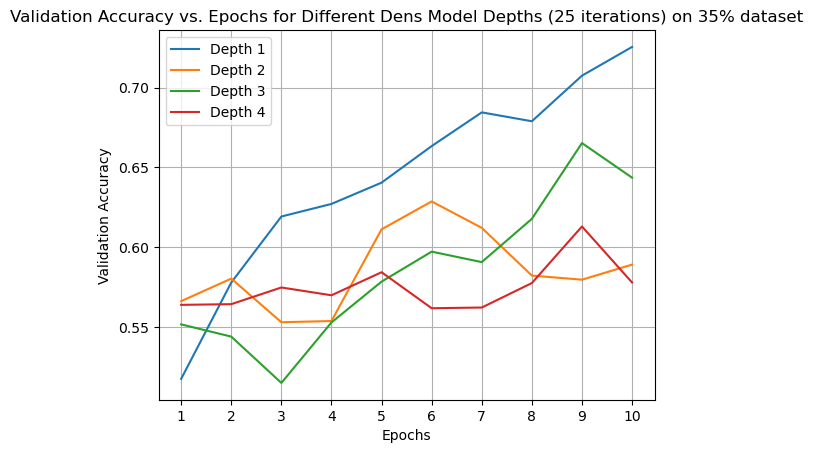

In [17]:
for i, column in enumerate(column_averages):
        plt.plot(np.arange(1, epochs + 1),column, label=f'Depth {i+1}')

plt.xticks(np.arange(1, epochs+1))

plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs. Epochs for Different Dens Model Depths ('+str(iteration)+' iterations) on 35% dataset')
plt.legend()
plt.grid(True)

# current_time = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
# filename = f"testing records/validation_accuracy_{current_time}.png"
# plt.savefig(filename)

In [18]:
current_time = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
filename = f"testing records/validation_accuracy_{current_time}.png"
plt.savefig(filename)

<Figure size 640x480 with 0 Axes>